In [2]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns

from sklearn.cluster import KMeans

import acquire


1) Clustering with the Iris Dataset

Using this lesson as a guide, perform clustering on the iris dataset.

    a) Choose features other than the ones used in the lesson.
    b) Visualize the results of your clustering.
    c) Use the elbow method to visually select a good value for k.
    d) Repeat the clustering, this time with 3 different features.

In [129]:
# acquire data
iris = acquire.get_iris_data()

In [130]:
iris.head()

,species_id,species_name,sepal_length,sepal_width,petal_length,petal_width
0,1,setosa,5.1,3.5,1.4,0.2
1,1,setosa,4.9,3.0,1.4,0.2
2,1,setosa,4.7,3.2,1.3,0.2
3,1,setosa,4.6,3.1,1.5,0.2
4,1,setosa,5.0,3.6,1.4,0.2


In [131]:
# establish df for clustering exploration
X = iris[['sepal_width', 'petal_width']]

In [132]:
# establish instance of k, fit and use to predict
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

kmeans.predict(X)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0,
       0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [133]:
# append predictions to our original dataframe
iris['cluster'] = kmeans.predict(X)

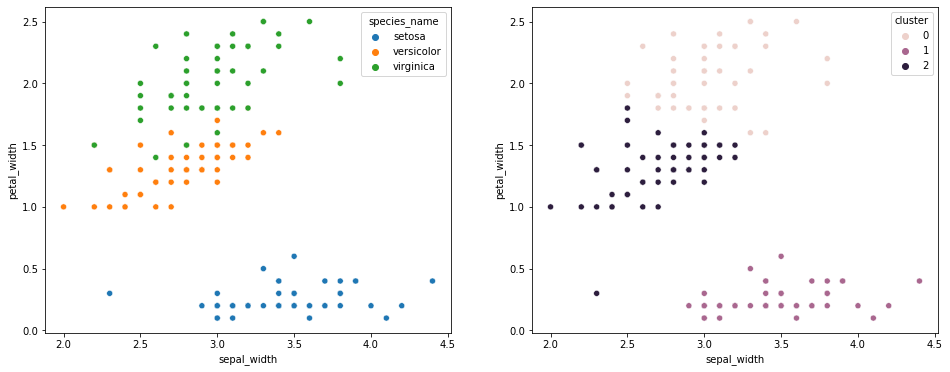

In [134]:
# Plot original vs kmeans cluster prediction
plt.figure(figsize=(16, 6))
plt.subplot(121)
sns.scatterplot(data=iris, x='sepal_width', y='petal_width', hue='species_name')
plt.subplot(122)
sns.scatterplot(data=iris, x='sepal_width', y='petal_width', hue='cluster')
plt.show()

In [135]:
# replace cluster numeric values w/species names
iris['cluster'] = iris['cluster'].replace({0:'virginica', 1:'setosa', 2:'versicolor'})

In [136]:
iris.cluster.value_counts()

versicolor    53
setosa        49
virginica     48
Name: cluster, dtype: int64

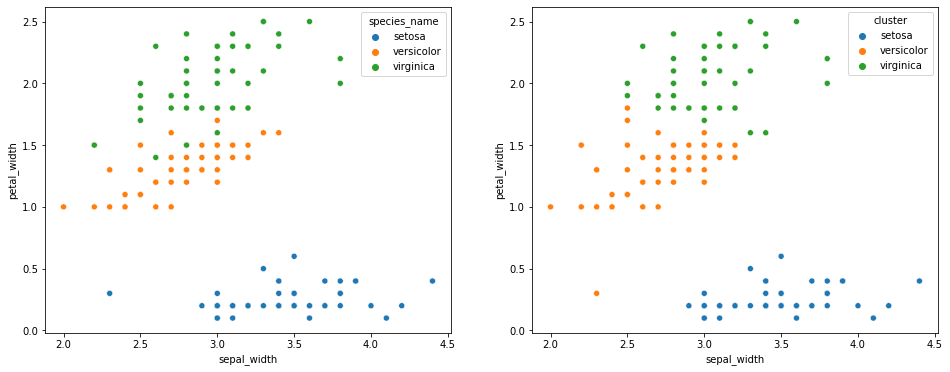

In [137]:
# Plot original vs kmeans cluster prediction
plt.figure(figsize=(16, 6))
plt.subplot(121)
sns.scatterplot(data=iris, x='sepal_width', y='petal_width', hue='species_name')
plt.subplot(122)
sns.scatterplot(data=iris, x='sepal_width', y='petal_width', hue='cluster')
plt.show()

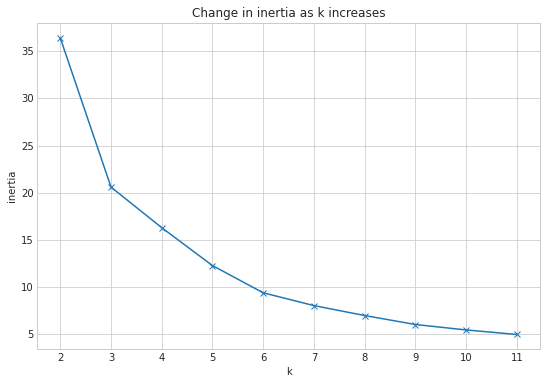

In [138]:
# Elbow grease
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')
    

In [139]:
# use 3 features instead of 2
# establish df for clustering exploration
Y = iris[['sepal_width', 'petal_width', 'petal_length']]

In [140]:
# establish instance of k, fit and use to predict
kmeans = KMeans(n_clusters=3)
kmeans.fit(Y)

kmeans.predict(Y)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [141]:
# append predictions to our original dataframe
iris['cluster_y'] = kmeans.predict(Y)

In [142]:
iris.head()

,species_id,species_name,sepal_length,sepal_width,petal_length,petal_width,cluster,cluster_y
0,1,setosa,5.1,3.5,1.4,0.2,setosa,1
1,1,setosa,4.9,3.0,1.4,0.2,setosa,1
2,1,setosa,4.7,3.2,1.3,0.2,setosa,1
3,1,setosa,4.6,3.1,1.5,0.2,setosa,1
4,1,setosa,5.0,3.6,1.4,0.2,setosa,1


In [83]:
iris.head()

,species_id,species_name,sepal_length,sepal_width,petal_length,petal_width,cluster,cluster_y
0,1,setosa,5.1,3.5,1.4,0.2,versicolor,1
1,1,setosa,4.9,3.0,1.4,0.2,versicolor,1
2,1,setosa,4.7,3.2,1.3,0.2,versicolor,1
3,1,setosa,4.6,3.1,1.5,0.2,versicolor,1
4,1,setosa,5.0,3.6,1.4,0.2,versicolor,1


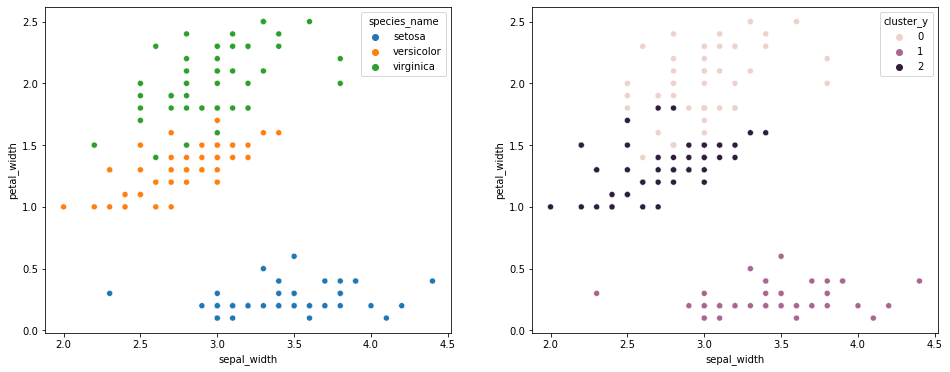

In [145]:
# Plot original vs predicted 
plt.figure(figsize=(16, 6))
plt.subplot(121)
sns.scatterplot(data=iris, x='sepal_width', y='petal_width', hue='species_name')
plt.subplot(122)
sns.scatterplot(data=iris, x='sepal_width', y='petal_width', hue='cluster_y')
plt.show()

In [146]:
# replace cluster numeric values w/species names
iris['cluster_y'] = iris['cluster_y'].replace({0:'virginica', 1:'setosa', 2:'versicolor'})

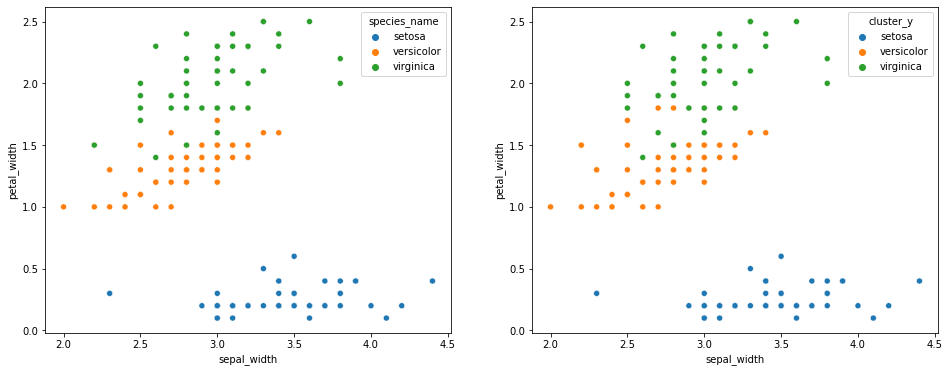

In [147]:
# Plot original vs kmeans cluster prediction
plt.figure(figsize=(16, 6))
plt.subplot(121)
sns.scatterplot(data=iris, x='sepal_width', y='petal_width', hue='species_name')
plt.subplot(122)
sns.scatterplot(data=iris, x='sepal_width', y='petal_width', hue='cluster_y')
plt.show()